## 载入数据

In [1]:
from random import uniform
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签，字体名称为win中中文字体对应的英文名
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

%matplotlib inline

In [3]:
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-"
"databases/undocumented/connectionist-bench/sonar/sonar.all-data")

In [4]:
try:
    # 第一个参数比较灵活，可以是url,也可是文件路径，或者IO等。
    df_sonar = pd.read_csv("../../data/sonar.csv", header=0)
except Exception as e:
    print(e)
    df_sonar = pd.read_csv(target_url, header=None, prefix='V')
    df_sonar.to_csv("../../data/sonar.csv", index=False)

df_sonar.head()

V0      V1      V2      V3      V4      V5      V6      V7      V8  \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       V9  ...     V51     V52     V53     V54     V55     V56     V57  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

      V58     V59  V60  
0  0.0090  0.0032    R  
1  0.0052  0.0044    R  
2  0.0095  0.0078    R  
3  0.0040  0.0117    R  
4  0.0107  0.0094    R  

[5 rows x 61 columns]

## 将target值变为数值型

In [5]:
nrows, ncols = df_sonar.shape

In [6]:
target = []
for i in range(nrows):
    #assign 0 or 1 target value based on "M" or "R" labels
    if df_sonar.iat[i, -1] == "M":
        target.append(1.0)
    else:
        target.append(0.0)

print("target: \n", target)

target: 
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

#### 使用sklearn试一试

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
obj_label_encoder = LabelEncoder()

In [9]:
obj_label_encoder.fit(df_sonar.iloc[:, -1])

LabelEncoder()

In [10]:
labels = obj_label_encoder.transform(df_sonar.iloc[:, -1])
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
df_sonar.iloc[:, -1]

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: V60, Length: 208, dtype: object

In [12]:
# fit_transform方法可以一步到位
# labels = obj_label_encoder.fit_transform(df_sonar.iloc[:, -1])
# labels

In [13]:
obj_label_encoder.transform(['R'])

array([1], dtype=int32)

问题是，sklearn的LabelEncoder不太好直接把0,1赋值对应M,R。也许是我没找到方法，目前可以写个函数变换.    
笨方法是，写个函数，将transform的结果，用1减一下。  

## 使用Column 35(第36列)属性和目标值绘制交会图

In [14]:
data_col = df_sonar.iloc[:, 35]

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(data_col, target)
ax.set_xlabel("Attribute Value")
ax.set_ylabel("Target Value")
plt.show()

上述图形有个问题：当其中一个变量只取有限的几个值的时候，很多点会叠在一起。  
如果这种点很多，则只能看到很粗的一条线，分辨不出这些点是如何沿线分布的。  
下面这种方法是很好的借鉴：**将有限值都加上一些随机数，并在绘图的时候，加上透明度（alpha=0.5）**

In [15]:
target = [uniform(-0.1, 0.1)+v for v in target]

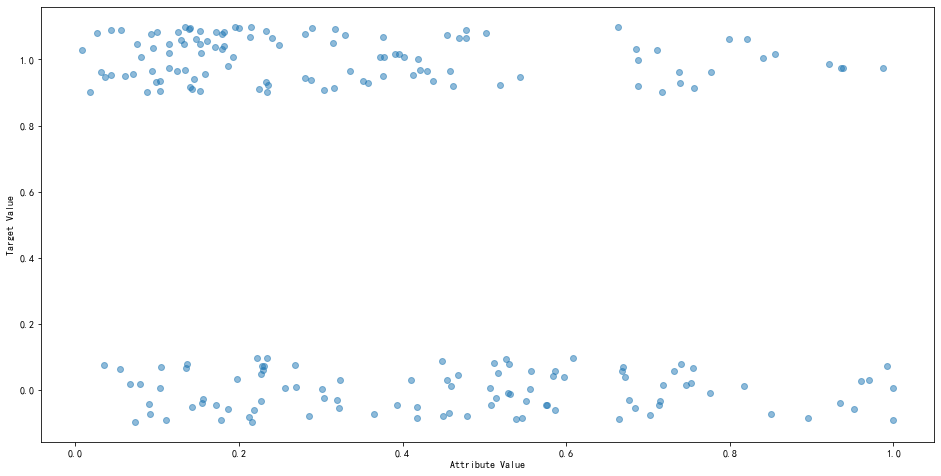

In [16]:
data_col = df_sonar.iloc[:, 35]

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(data_col, target, alpha=0.5)
ax.set_xlabel("Attribute Value")
ax.set_ylabel("Target Value")
plt.show()